# Tasks
### This workbook contains my solutions to the tasks for the Machine Learning and Statistics Module





#### Task 1 - October 5th, 2020 
Write a Python function called sqrt2 that calculates and prints to the screen the square root of 2 to 100 decimal places. Your code should not depend on any module from the standard library or otherwise. You should research the task first and include references and a description of your algorithm.
#### Research
Newton's method [1] can be used to calculate the square root of a number by first taking a guess and then iteratively moving closer toward the actual square root. According to Newton's method, one can approach further toward the square root of a number, x, from an initial guess of the square root, z, as follows:

$$ z_{next} = z - \frac{z^2-x}{2z} $$

Newton's method is of course straightforward to program in Python - one uses Python's operators (-, * and /) to perform each instance of the calculation, and then one instructs the program to keep performing the calculation, using the output of the previous instance as the input to the next, until the square of the output is however close to the number that one is trying to get the square root of (one could say to within 0.001, for example). One would then specify to how many decimal places one would like one's calculated root to have, in this instance, 100.

However, there are two impediments to calculating the square root of 2 to a precision to 100 decimal places without using any Python modules, as anyone who tries will quickly find out:
1. Decimal point numbers do not have exact representations in binary floating point, which is essentially what Python's float datatype is, and which is the only datatype available for displaying decimal numbers in Python without the use of modules such as Decimal [2]. This means that we will not likely be able to achieve the accuracy required to display the square root of two to 100 decimal places with precision, i.e. exactly, as in order to do so we would have to perform many very precise calculations involving floating point numbers, which are themselves by definition not exact, i.e. imprecise.
2. Python is simply not able to store 100 decimal places in a floating point number

It is important to note, however, that the problem is not with the Python operators (-, * and /) or loops, but only the float datatype itself. This means that if we could somehow use the other numerical datatype that does not need to be imported in Python, i.e. the integer, to perform the calculation, we should not have a problem - except, that is, for the fact that the integer datatype by does not cater to decimal places.

The trick, then, is to forget about decimal places during the calculation itself, and then insert the decimal place afterwards using the string datatype. What if, instead of calculating the square root of two, we calculated the first hundred digits of the square root of: $$2\times10^{100000000}$$

Looking at the two numbers as strings, the only difference would be that one has a '.' and the other does not; and because integers have exact representations in Python's integer datatype, we should not come across any imprecision as we would have using the float datatype. Credit to here [4] for this solution.

What will thus been shown as part of my solution is as follows:
1. Python's Math module's sqrt function is not accurate to the 100th decimal place (we will use NASA's calculation of the root of 2 to ~ million decimal places as our comparison [3]), nor is it able to even provide 100 decimal places. From this we can infer that the inaccuracy resides in thh datatype used by this function, namely, the float.
2. Python's Decimal module's sqrt function is accurate to 100 decimal places, again indicating that Python's float datatype is what is at issue above.
3. Python's float datatype cannot calculate the square root of two such that the difference between the actual root squared and the calculated root squared is less than .0001.
4. The square root of two can be calculated by using the integer datatype to calculate the square root of *2\*10^100000000* and then converting it to a string, slicing to retain only the first 100 characters, and then dutifully inserting the decimal point.


[1] https://mathworld.wolfram.com/NewtonsMethod.html

[2] https://docs.python.org/2/library/decimal.html

[3] https://stackoverflow.com/questions/22162522/how-to-display-a-decimal-number-to-100-decimal-places

[4] https://stackoverflow.com/questions/64295245/how-to-get-the-square-root-of-a-number-to-100-decimal-places-without-using-any-l

In [1]:
# hint at the inaccuracy of the sqrt function in the
# Math module, which uses floats
from math import sqrt
sqrt(2)**2

2.0000000000000004

In [2]:
# print the Math module's square root of 2 to 100
# decimal places
answer = "%.100f" % sqrt(2)
print(answer)
# confirm that there are 100 decimal places
print(len(str((answer))) - 2)

1.4142135623730951454746218587388284504413604736328125000000000000000000000000000000000000000000000000
100


In [3]:
# we will take NASA's calculation of the root of 2
# as accurate to 100 decimal places
nasa = "1.41421356237309504880168872420969807856967187537694807317667973799073247846210703885038753432764157273501384623091229702492483605585073721264412149709993583141322266592750559275579995050115278206057147010955997160597027453459686201472851..."
nasa = nasa[:101]
# check at which decimal place the Math module
# becomes inaccurate, and thus floats likely
# become inaccurate
for i in range(102):
    if str(answer)[i] != nasa[i]:
        accuracy = i - 2
        break
# check how many places (inaccurate or otherwise)
# the math module can calculate the root of 2 to
for i in range(102):
    if str(answer)[i] != "0":
        x = 0
    if str(answer)[i] == "0":
               x+=1
    if x == 4:
        place = i-2-x
        break
print("Python's Math module's sqrt function is accurate to the " + str(accuracy) + "th place, although it provides an answer to the " + str(place) + "th place.")

Python's Math module's sqrt function is accurate to the 15th place, although it provides an answer to the 51th place.


In [4]:
# show that the Decimal module can calculate the
# square root of 2 to 100 decimal places, by 
# comparing with NASA's figure, above
from decimal import Decimal, getcontext
# set the decimal point precision to 100
getcontext().prec = 100
# get the decimal square root of 3
Decimal(2).sqrt()
print(nasa)
print(Decimal(2).sqrt())
# as the NASA has not been rounded, 
# we will check the first 99 decimal values
# for simplicity instead
print(str(Decimal(2).sqrt())[:100] == nasa[:100])

1.414213562373095048801688724209698078569671875376948073176679737990732478462107038850387534327641572
1.414213562373095048801688724209698078569671875376948073176679737990732478462107038850387534327641573
True


In [5]:
# Find the difference between 2 and the square root of 2
# to a hundred decimal places squared
# note that this number is far smaller than that for
# the Math module's function (.0000000000000004)
Decimal(2 - 1.414213562373095048801688724209698078569671875376948073176679737990732478462107038850387534327641573 ** 2)

Decimal('-4.44089209850062616169452667236328125E-16')

In [6]:
# design an algorithm implementing Newton's Method
# Newton's method: better guess = 0.5 * (guess + number / guess)
# store the desired precision in a variable
# we decide on the precision outside of the function itself
# as the requirements of the question do not indicate
# that precision should be inputted as a parameter to the function
def squareRootOfTwo():
    # store 2 in a variable so that we are not
    number = 2
    # hardcoding values
    # have the function take a guess
    guess = 1.5
    # while the guess is not of a sufficient accuracy,
    # apply Newton's algorithm to improve it.
    # To check the accuracy of the guess, square it and
    # check if the absolute difference between the result 
    # and the input is less than the desired precision.
    while abs(guess ** 2 - number) > precision:
        # if greater than the precision, apply Newton's alogrithm
        guess = guess - ((guess ** 2 - number) / 2 * guess)
        # once the guess is sufficiently accurate the while
        # loop ends. Now round the result to your liking
    print("%.100f" % guess)
    return str(answer)

In [7]:
# Now we will test Newton's method for calculating
# the square of two, and time the calculation
import time
precision = 0.01
start = time.time()
answer = squareRootOfTwo()
end = time.time()
print(str(round(end - start, 1)) + " seconds taken")
# check how many places (inaccurate or otherwise)
# this run of the algorithm calculated the root of 2 to
for i in range(len(answer)):
    if str(answer)[i] != "0":
        x = 0
    if str(answer)[i] == "0":
               x+=1
    if x == 4:
        place = i-2-x
        break
print("Running our function so that the square of the calculated square root of two is between 1.9 and 2.1 provides an approximation of the square root of two to the " + str(place) + "th place.")

1.4177445877362315762582056777318939566612243652343750000000000000000000000000000000000000000000000000
0.0 seconds taken
Running our function so that the square of the calculated square root of two is between 1.9 and 2.1 provides an approximation of the square root of two to the 51th place.


In [8]:
# Same again but to a precision of 0.001
# note the increase from 89.6 seconds to seconds
import time
precision = 0.001
start = time.time()
answer = squareRootOfTwo()
end = time.time()
print(str(round(end - start, 1)) + " seconds taken")
# check how many places (inaccurate or otherwise)
# this run of the algorithm calculated the root of 2 to
for i in range(len(answer)):
    if str(answer)[i] != "0":
        x = 0
    if str(answer)[i] == "0":
               x+=1
    if x == 4:
        place = i-2-x
        break
print("Running our function so that the square of the calculated square root of two is between 1.99 and 2.01 provides an approximation of the square root of two to the " + str(place) + "th place.")

1.4145670714723390659628421417437493801116943359375000000000000000000000000000000000000000000000000000
0.9 seconds taken
Running our function so that the square of the calculated square root of two is between 1.99 and 2.01 provides an approximation of the square root of two to the 51th place.


In [9]:
# Same again but to a precision of 0.0001
# note the increase from 89.6 seconds to seconds
import time
precision = 0.0001
start = time.time()
answer = squareRootOfTwo()
end = time.time()
print(str(round(end - start, 1)) + " seconds taken")
# check how many places (inaccurate or otherwise)
# this run of the algorithm calculated the root of 2 to
for i in range(len(answer)):
    if str(answer)[i] != "0":
        x = 0
    if str(answer)[i] == "0":
               x+=1
    if x == 4:
        place = i-2-x
        break
print("Running our function so that the square of the calculated square root of two is between 1.999 and 2.001 provides an approximation of the square root of two to the " + str(place) + "th place.")

1.4142489172699921340381479240022599697113037109375000000000000000000000000000000000000000000000000000
89.4 seconds taken
Running our function so that the square of the calculated square root of two is between 1.999 and 2.001 provides an approximation of the square root of two to the 51th place.


We can note two things from the running of our function with different precision demands:
1. The number of decimal places remains the same (51) despite varying precision demands, indicating that there is a limit to the number of decimal places that a float is capable of storing.
2. The computational expense of calculating the square root of two increases very quickly with respect to an increased demand for precision (from 0.0 seconds at 0.1 precision to 1.1 seconds at 0.001 precision to approximately 100 seconds at 0.0001 precision). If one tries to attain an even greater precision, one will see that the function simply times out, i.e. the precision cannot be attained by Python's float datatype.

*The conclusion from this is thus that it is not possible to use the float datatype to calculate the square root of 2 to 100 decimal places.*

It is important to note, however, that the problem is not with the Python operators (-, * and /) or loops, but only the float datatype itself. This means that if we could somehow use the other numerical datatype that does not need to be imported in Python, i.e. the integer, to perform the calculation, we should not have a problem - except, that is, for the fact that the integer datatype by does not cater to decimal places.

The trick, then, is to forget about decimal places during the calculation itself, and then insert the decimal place afterwards using the string datatype. What if, instead of calculating the square root of two, we calculated the first hundred digits of the square root of:
$$2\times10^{100000000}$$
 
Looking at the two numbers as strings, the only difference would be that one has a '.' and the other does not; and because integers have exact representations in Python's integer datatype, we should not come across any imprecision as we would have using the float datatype.

In [10]:
# rewrite our function so that it calculates the square root
# of 2*10**100000000, and then manipulate this using
# string operations into the square root of two
def squareRootOfTwo():
    number = 2*10**200
    # have the function take a guess
    guess = number // 2
    # while the guess is not of a sufficient accuracy,
    # apply Newton's algorithm to improve it.
    # This time, because we are dealing with very large
    # numbers, it is not practical to check that the answer
    # is precise. Instead, we will assume that after 1000
    # iterations it is as precise as we need.
    for i in range(1000):
        # if greater than the precision, apply Newton's alogrithm
        guess = guess - ((guess ** 2 - number) // (2 * guess))
        # once the guess is sufficiently accurate the while
        # loop ends. Now round the result to your liking
    return guess

In [11]:
import time
precision = 10**100
start = time.time()
answer = squareRootOfTwo()
end = time.time()
# we only want the first 100 characters
answer = list((str(answer)[:100]))
finalanswer = []
# the first character will be the same as answer
finalanswer.append(answer[0])
# the second will be a decimal point
finalanswer.append(".")
# now add the rest of the characters
for i in range(1, len(answer)):
    finalanswer.append(answer[i])
# print our final answer
print("".join(finalanswer))
# print NASA's calculation
print(nasa[:101])
# check if they are the same
print("".join(finalanswer) == nasa[:101])


1.414213562373095048801688724209698078569671875376948073176679737990732478462107038850387534327641572
1.414213562373095048801688724209698078569671875376948073176679737990732478462107038850387534327641572
True


#### Task 2 November 2nd, 2020: 
The Chi-squared test for independence is a statistical
hypothesis test like a t-test. It is used to analyse whether two categorical variables
are independent. The Wikipedia article gives the table below as an example [4],
stating the Chi-squared value based on it is approximately 24.6. Use scipy.stats
to verify this value and calculate the associated p value. You should include a short
note with references justifying your analysis in a markdown cell.

<table>
    <tr>
        <td><td>
        <td>A<td>
        <td>B<td>
        <td>C<td>
        <td>D<td>
        <td>Total<td>
    <tr>
    <tr>
        <td>White Collar<td>
        <td>90<td>
        <td>60<td>
        <td>104<td>
        <td>95<td>
        <td>349<td>
    <tr>
    <tr>
        <td>Blue Collar<td>
        <td>30<td>
        <td>50<td>
        <td>51<td>
        <td>20<td>
        <td>151<td>
    <tr>
    <tr>
        <td>No Collar<td>
        <td>30<td>
        <td>40<td>
        <td>45<td>
        <td>35<td>
        <td>150<td>
    <tr>
    <tr>
        <td>Total<td>
        <td>150<td>
        <td>150<td>
        <td>200<td>
        <td>150<td>
        <td>650<td>
    <tr>
<table>
    

<br>
I will first simply use scipy.stats to find the chi-squared value and the corresponding p-value for this sample. One can achieve that without actually understanding how the chi-squared value is actually calculated.the chi2_contingency function can achieve this for us - it's only mandatory parameter is the array of frequencies for each category.

In [12]:
import numpy as np
import scipy.stats as ss

data = np.array([[90, 60, 104, 95],[30, 50, 51, 20],[30, 40, 45, 35]])

chi2, p, dof, expected = ss.chi2_contingency(data)

print(f"chi^2 = {chi2}")
print(f"p-value = {p}")
if p < 0.05:
    print("As the p-value is less than 0.05, the null hypothesis, that the categories are independent, can be assumed to be false.")

chi^2 = 24.5712028585826
p-value = 0.0004098425861096696
As the p-value is less than 0.05, the null hypothesis, that the categories are independent, can be assumed to be false.


As regards understanding what the chi-squared test achieves, its meaning is actually quite intuitive. This is in contrast to the chi-squared distribution, whose probability density function is certainly intimidating to look at, and mathematically depends on the gamma function - and many say that to understand the gamma function one must first understand the exponential and the poisson functions... Wikipedia's definition of the test is lucid:

> The chi-squared test is a statistical test applied to sets of categorical data to evaluate how likely it is that any observed difference between the sets arose by chance [...] It tests a null hypothesis stating that the frequency distribution of certain events observed in a sample is consistent with a particular theoretical distribution. The events considered must be mutually exclusive and have total probability [1].

For example, when we flip a coin, the result is either heads or tails, not both - this covers mutual exclusivity. The result also *must* be either heads or tails, meaning that the probability of heads coming up and that of tails coming up equals 1. Of course, we know that a standard coin has a .5 chance of turning up heads, and .5 chance of turning up tails. Thus, if we flip a coin 100 times, and we get 65 heads and 35 tails, we could use the chi-squared test to evaluate whether the disparity between this and the expected 50/50 outcome should be put down to chance or not. Basically, the chi-squared test may inform us that the disparity would highly unlikely to be down to chance, and it may be that the coin is not evenly weighted, for example.

The chi-squares test operates then by calculating the chi-squared value of a sample, or number of samples. To get this value, we must first calculate a value that represents the variance between the expected frequency of a category in question with the actual frequency observed in the sample. The formula for this is:
$$\frac{(expected value - actual value)^2}{expected value}$$

This formula is very similar to that for standard deviation, as we would expect, because we are here calculating a kind of variance between the expected and actual frequencies in the sample. To obtain the chi-squared value, we then just sum the 'variance' of each category in each sample:

$${\displaystyle \chi ^{2}=\sum _{i=1}^{n}{\frac {(O_{i}-E_{i})^{2}}{E_{i}}}}$$


There are two further things that are important to grasp when understanding how we evaluate the chi-squared value to actually carry out the chi-squared test.
1. The higher the chi-squared value, the higher the 'variance' between the expected and actual frequencies for the categories, and thus the higher likelihood that the null hypothesis is false.
1. Because the chi-squared value is the sum of the 'variances' for each category and sample, more categories and samples will lead to a higher chi-squared value.

When one considers both of the above, it is clear that one must evaluate the chi-squared value differently for different numbers of categories and samples. Thus, while the chi-squared value represents our test-statistic, to obtain the more meaningful 'p-value', we must factor in what are know as the 'degrees of freedom,' which can be calculated from the number of categories and samples. If one looks at the table above, one can see that apart form the first and last rows and columns, each row represents a category, and each column a sample. Basically, the degrees of freedom is the number of pieces of data that we need in order to calculate our test-statistic, here the chi-squared value. In this case, we need $(rows - 1)(columns - 1)$ pieces of data, because (assuming we know the total number of datapoints for each category and the total number of datapoints in each sample, which is a safe assumption) we can calculate the frequency of any one category in any one sample by either subtracting the frequencies of the other categories from the total in that sample, or subtracting the frequencies of the category in the other samples from the total datapoints for that category. Thus, for our coin example, the degrees of freedom would be $(2-1)(2-1) = 2$. 

Once we are equipped with the chi-squared value and the degrees of freedom, we are then able to plot the probability density function for a chi-squared-distribution with those degrees of freedom. Then, we calculate the area under the function and to the left of the calculated chi-squared value (represented by the x-axis), and if that area is less than 0.95, we can reject the null hypothesis (or accept if greater). This is essentially how the p-value of the test is calculated: $1 - area = Pvalue$.

Once the purpose and meaning of the chi-squared test is understood, the actual chi-squared distribution becomes much more manageable. In particular, the manner in which the pdf changes with changing degrees of freedom becomes actually intuitively understandable, as the chi-squared value has been shown above to increase with increasing degrees of freedom.


References
[1] https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test

[2] https://python-bloggers.com/2020/09/how-to-run-chi-square-test-in-python/

#### Task 3 November 16th, 2020
The standard deviation of an array of numbers x is
calculated using numpy as np.sqrt(np.sum((x - np.mean(x))**2)/len(x)) .
However, Microsoft Excel has two different versions of the standard deviation calculation, STDDEV.P and STDDEV.S . The STDDEV.P function performs the above
calculation but in the STDDEV.S calculation the division is by len(x)-1 rather
than len(x) . Research these Excel functions, writing a note in a Markdown cell
about the difference between them. Then use numpy to perform a simulation
demonstrating that the STDDEV.S calculation is a better estimate for the standard deviation of a population when performed on a sample. Note that part of
this task is to figure out the terminology in the previous sentence.

#### Research
Like many statistical phenomena, there is both a mathematical and intuitive explanation of why when calculating the standard deviation of a sample we divide the sum of the squared distances of each point from the sample mean (i.e the variance) from the size of the sample minus one rather than simply the size of the sample. I will here eschew the mathematical explanation in favour of the intuitive. I have taken this intuitive explanation mostly from this video [1].

Firstly, one must understand the difference between a population and its sample:

* A population is a complete set of data.
* A sample is a sample from a population, and thus is an incomplete set of data.

Secondly, one must understand how variance is calculated:
* Variance is a measure of the spread of a dataset, and is measured as a sum of each the datapoint's distances from the mean squared.
* The distances are squared for two reasons: (1) to avoid a situation where the negative and positive distances from the mean would simply cancel each other and the variance would be zero - by squaring the distances from the mean the result will always be positive and there will be no cancellingo out; (2) to align with what are called the statistical moments of a distribution, which is a topic for another day.
* If you still think that squaring the distances seems somewhat artificial, then you are correct to the extent that variance in itself is not a very meaningful value. It is only when one reduces it by dividing by a certain factor and then getting the square root of the result (thereby to a certain extent undoing the previous squaring of the distances) that one arrives at an intrinsically meaningful value - the standard deviation, which represents how much individual values tend to deviate from the mean.

With an understanding of the difference between a population and a sample, and how variance is calculated, understanding 
Because a sample is an incomplete version of a population, statistical phenomena that are derived from the entirety of a dataset's data points, such as the mean, are likely to be different in the population and the sample because there are data points in the population that are missing in the sample. As suggested above, when calculating the variance of a sample/population, we first need to calculate the sample/population mean. This is simply because the mean is involved in the calculation of variance, as variance is a measure of the data points' distance from the mean. Now this the key thing to understand: if one calculates the mean of a sample and then calculates the variance, *and if one then artifically changes the mean in anyway without changing the datapoints and then recalculates the variance using that artificial mean, this new variance will always be greater than the originally calculated variance.* This because the mean is calculated in such a way that it minimizes the total distance of data points from itself and is as much as possible equidistant from all the datapoints (it is a kind of middle value).

As we said above, the population mean is almost always different from the sample mean. This means that the sample variance from the population mean will always be greater than the sample variance from the sample mean. To counteract this bias in the sample variance, we  decrease the value of the denominator when calculating the standard deviation so that its value larger than it would have been had we not decreased it. Thus, instead of dividing by n, we divide be n - 1. But why n - 1?

The reason for the choice of -1 is somewhat less intuitive, although related to the foregoing. It involves what are called degrees of freedom. The degrees of freedom represents the number of data points that are 'free to move', or are independent.

Take a univariate dataset, i.e. where there is one variable, of which we know the mean. In a sample from the population, each new datapoint, i.e. each value that the variable takes on, is independent of the population value. This is because the population cannot be in any way used to calculate the values in the sample (it might suggest ranges for values, but not actually values themselves.). This means that the degrees of freedom of a population is always the size of the population, n. If we take the *sample* mean, however, the situation is different. Here, in a sense there is no longer a one-way relationship where the mean is derived from the values but not the other way around. This is because if we know all but one of the values in the sample as well as the sample mean, then we also can *derive* the remaining value. This means that the remaining value is actually not independent - it is not 'free.' As such, the degrees of freedom of the sample is the size of the sample minus one, n - 1. When we calculate standard deviation, we divide not by the size of the dataset but by the degrees of freedom. In the case of populations, this just happens to equal the size of the dataset. It is also worth mentioning that the same coincidence happens when first calculating the sample mean. Because at that point we do not know the mean, then every value is free and cannot be derived from any other value available to us - hence the degrees of freedom in that case is equal also the sample size.

To demonstrate that dividing by the degrees of freedom provides a more accurate standard deviation value than dividing by the size of the sample, I will do the following:

1. Simulate a normally distribute dataset using numpy.random's normal() function, which takes in the standard deviation as a parameter.
1. Manually calculate the standard deviation of the population according to both formulas, using 1,000 different samples, to calculate the percentage of times which formula was more accurate.
1. To make the demonstration even more interesting, we can perform step 2 for twice, where one time we use the population mean to calculate the standard deviation, and the other time we use the sample mean. We would expect that while the (n-1) calculation would be more accurate when using the sample mean in the calculation, the results are likely to be more evenly split when using the population mean. This is because when we use the sample mean, then the degrees of freedom is equal to n - 1, whereas when we use the population mean, the degrees of freedom is equal to n.

[1] https://www.youtube.com/watch?v=wpY9o_OyxoQ

In [13]:
import numpy as np
import math
rng = np.random.default_rng()


mu, sigma, n = 10, 3, 10000 # mean, standard deviation and size of dataset
print(f'When calculating the standard deviation of the population using the population mean and a sample, across 1,000 samples, the results are as follows:')
answer = 0
for i in range(1000):
    norm = rng.normal(mu, sigma, n)
    popstd = np.sqrt((sum(abs(norm - mu)**2))/len(norm))
    sampstd = np.sqrt((sum(abs(norm - mu)**2))/(len(norm)-1))
    if abs(sigma - popstd) < abs(sigma - sampstd):
            answer+=1
print(f'The STDDEV.S - np.sqrt(np.sum((x - np.mean(x))**2)/(len(x)-1)) - calculation was more accurate {answer/10}% of the time.')
    
n = int(n/math.sqrt(n))
print(f'\nWhen calculating the standard deviation of the population using a sample and its sample mean, across 1,000 samples, the results are as follows:')
for i in range(1000):
    norm = rng.normal(mu, sigma, n)
    popstd = np.sqrt(np.sum((norm - np.mean(norm))**2)/len(norm))
    sampstd = np.sqrt(np.sum((norm - np.mean(norm))**2)/(len(norm)-1))
    if abs(sigma - popstd) < abs(sigma - sampstd):
        answer+=1
print(f'The STDDEV.S calculation was more accurate {answer/10}% of the time.')

When calculating the standard deviation of the population using the population mean and a sample, across 1,000 samples, the results are as follows:
The STDDEV.S - np.sqrt(np.sum((x - np.mean(x))**2)/(len(x)-1)) - calculation was more accurate 52.5% of the time.

When calculating the standard deviation of the population using a sample and its sample mean, across 1,000 samples, the results are as follows:
The STDDEV.S calculation was more accurate 99.2% of the time.


#### Task 4 November 30th, 2020
Use scikit-learn to apply k-means clustering to Fisher’s famous Iris data set. You will easily obtain a copy of the data set online. Explain in a Markdown cell how your code works and how accurate it might be, and then explain how your model could be used to make predictions of species of iris.

#### Research

I did not need to do any research for this task as I had performed much more complex machine learning analysis of the Iris data set in the first semester of this course. The steps I took to complete this task were as follows:

1. I obtained the Iris dataset from a GitHub account [1] that provides a csv file of the orginial dataset [2].

2. I stored the dataset in a numpy array and removed the label column.

3. I used sklearn.cluster's kmeans function [3] to train a model from the dataset.

4. I then reviewed the groups the model identified in the dataset, and identified which labels the model used for setosa-like, versicolor-like, and virginica-like data points.

5. I then calculate the precision, as well as the false positive and false negative rates for each of the groups. I calculated the precisions in particular as this is a statistic that can be used to easily compare the effectiveness of our kmeans model with other models. Precision is defined as follows:
> Precision can be seen as a measure of a classifier’s exactness. For each class, it is defined as the ratio of true positives to the sum of true and false positives. Said another way, “for all instances classified positive, what percent was correct?”

6. I then showed how to use the model to attempt to predict an iris flower's species.

7. I then reused code I had written elsewhere [5] to perform an LDA of the iris dataset, both using sklearn's built-in method as well as manually, to compare precision of the kmeans model against  the LDA model. The LDA model is far superior in terms of precision.


[1] https://gist.github.com/curran/a08a1080b88344b0c8a7

[2] https://archive.ics.uci.edu/ml/datasets/Iris

[3] https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

[4] https://github.com/ashleycampion/IrisDataSetProject/blob/master/dimensionalityReduction.py

[5] https://www.scikit-yb.org/en/latest/api/classifier/classification_report.html

In [14]:
# Numerical arrays.
import numpy as np

# Machine learning - KMeans.
import sklearn.cluster as skcl

# Plotting.
import matplotlib.pyplot as plt

# Get the csv file
import pandas as pd

iris = pd.read_csv("https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv")

iris
df = iris

In [15]:
# we want to remove the fifth column of each array, as that is the label
irisReady = np.array(iris)[:,0:4]
print(irisReady[:1])

[[5.1 3.5 1.4 0.2]]


In [16]:
# Perform kmeans fitting.
# n_clusters=3 as we know there are three types of irises
kmeans = skcl.KMeans(n_clusters=3, random_state=0).fit(irisReady)

In [17]:
# see the labels of each data point, i.e. which of the three groups they are in
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [18]:
# the '1's (the setosas) are clearly accurately identified by our k-means algorithm.
# however, there appears to be some overlap between the '0's (versicolor) and the '2's (virginicas).
# we can now calculate the percentage of points that were accurately labelled by our model, as well as
# the false positive and false negative rates for each type of iris that our k-means model attempts to identify in our sample

irisLabels = np.array(iris)[:,4]
totalFalse, setosaFalsePos, setosaFalseNeg, versicolorFalsePos, versicolorFalseNeg, virginicaFalsePos, virginicaFalseNeg = 0,0,0,0,0,0,0
for label, cluster in zip(irisLabels, kmeans.labels_):
    if (label != "setosa" and cluster == 1):
        setosaFalsePos += 1
    elif (label == "setosa" and cluster != 1):
        setosaFalseNeg +=1

    if (label != "versicolor" and cluster == 0):
        versicolorFalsePos += 1
    elif (label == "versicolor" and cluster != 0):
        versicolorFalseNeg +=1

    if (label != "virginica" and cluster == 2):
        virginicaFalsePos += 1
    elif (label == "virginica" and cluster != 2):
        virginicaFalseNeg += 1

unique, counts = np.unique(irisLabels, return_counts=True)

totalFalse = setosaFalsePos + versicolorFalsePos + virginicaFalsePos
print(f'{(totalFalse / sum(counts)).round(2) * 100}% of points were inaccurately identified\n')

print(f'The precision for setosa-identification was {(counts[0] - setosaFalsePos) / counts[0] * 100}%')
setosaFalsePos /= counts[0]
print(f'{(setosaFalsePos * 100).round(2)}% of points identified as setosas were false positives')
setosaFalseNeg /= counts[0]
print(f'{(setosaFalseNeg * 100).round(2)}% of points not identified as setosas were false negatives\n')

print(f'The precision for versicolor-identification was {(counts[1] - versicolorFalsePos) / counts[1] * 100}%')
versicolorFalsePos /= counts[1]
print(f'{(versicolorFalsePos * 100).round(2)}% of points identified as versicolor were false positives')
versicolorFalseNeg /= counts[1]
print(f'{(versicolorFalseNeg * 100).round(2)}% of points not identified as versicolor were false negatives\n')

print(f'The precision for virginica-identification was {(counts[2] - virginicaFalsePos) / counts[2] * 100}%')
virginicaFalsePos /= counts[2]
print(f'{(virginicaFalsePos * 100).round(2)}% of points identified as virginicas were false positives')
virginicaFalseNeg /= counts[2]
print(f'{(virginicaFalseNeg * 100).round(2)}% of points not identified as virginicas were false negatives')


11.0% of points were inaccurately identified

The precision for setosa-identification was 100.0%
0.0% of points identified as setosas were false positives
0.0% of points not identified as setosas were false negatives

The precision for versicolor-identification was 72.0%
28.0% of points identified as versicolor were false positives
4.0% of points not identified as versicolor were false negatives

The precision for virginica-identification was 96.0%
4.0% of points identified as virginicas were false positives
28.0% of points not identified as virginicas were false negatives


While our model successfully grouped all the setosas together, it identified more than a quarter of virginicas as versicolors. Its precision in identying versicolors was also quite low, at 72%. Below we will see than there are other classification algorithms that are able to identify species with much greater precision.

In [19]:
# we can use the kmeans model to attempt to precidt irises' species as follows:
predictions = kmeans.predict(np.array([[0,0,0,0,], [3,3,3,3,], [10,10,10,10]]))
print(predictions)
# we can make the predictions more readable for us as follows:
predictions = predictions.astype('str')
predictions[predictions == "1"] = "setosa"
predictions[predictions == "0"] = "versicolor"
predictions[predictions == "2"] = "virginica"
print(predictions)

[1 0 2]
['setosa' 'versicolor' 'virginica']


Here is the confusion matrix for sklearn's LDA of the Iris dataset:
[[10  0  0]
 [ 0 11  0]
 [ 0  1  8]]

Here is the Classification Report for sklearn's LDA of the Iris dataset:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.92      1.00      0.96        11
   virginica       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



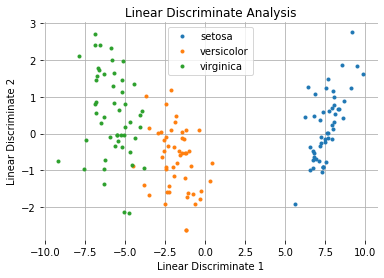

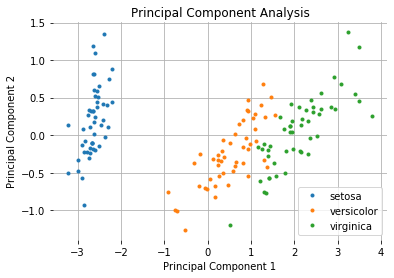

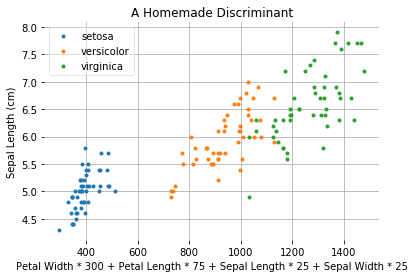

Eigenvalue 1's explained variance: 0.9914724756595078
Eigenvalue 2's explained variance: 0.008527524340492263
Eigenvalue 3's explained variance: -6.668818402603966e-17
Eigenvalue 4's explained variance: -6.668818402603966e-17


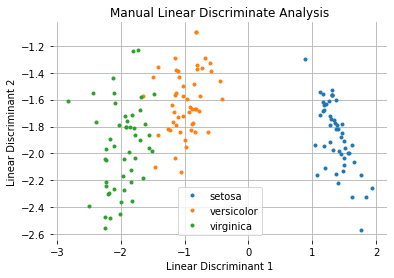

In [20]:
# the below code performs an LDA of the iris dataset for comparison
# it will be shown that LDA provides a better model for the Iris dataset


# for creating the actual scatter plots we want matplotlib.pyplot
import matplotlib.pyplot as plt

# we only need access to the 'LinearDiscriminantAnalysis'
# and 'PrincipalComponentAnalysis'
# functions from sklearn.discriminat_analysis
# and sklearn.decomposition respectively
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
# to test our models we will need to split our dataset in training
# and testing sets; we import train_test_split for this purpose
from sklearn.model_selection import train_test_split
# we also want to display the classification report
# and confusion matrix based on our tests
from sklearn.metrics import classification_report, confusion_matrix

# we will use the os module to create the
# the directory to store the files to



def createLDAScatterPlot():

    # the code for this is adapted from here:
    # # https://sebastianraschka.com/Articles/2014_python_lda.html

    # we want to split the dataset into the variables proper
    # and the classes, i.e. the species. dataframe.iloc[]
    # can do this, which takes two parameters, the first slicing
    # the rows, the second the columns. Here we want all the rows,
    # and the first four columns. In the second case we only want the
    # fifth column
    X = df.iloc[:,0:4]
    Y = df.iloc[:,4]

    # we want to plot this on a 2D plane, so we want to use
    # two linear discriminants to perform the LDA, which two
    # discriminants will then become the two dimensions that we plot
    sklearn_lda = LDA(n_components=2)

    # there is a very nice explanation of how the fit() and transform()
    # methods work here:
    # https://stackoverflow.com/questions/23838056/what-is-the-difference-between-transform-and-fit-transform-in-sklearn
    # basically, fit() takes in the training data as a parameter,
    # is called with one of sklearn's dimension-reducing algorithms,
    # and then creates the learning model that will, once the transform()
    # method is called with training/test data, translate each datum's
    # variable values into the discriminant values by which, in the case
    # of LDA, the datasets classes can best be discriminated by.

    # ordinarily we would split the dataset into training data
    # and testing data, but because here we want to visualize the
    # lda in a plot, we can just use the whole dataset
    X_lda_sklearn = sklearn_lda.fit_transform(X, Y)
    # we set the size of the test set as 0.2 of the dataset,
    # which is a generally well-performing proportion, and
    # we don't need to set the random seed parameter. See here:
    # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
    Y_predictions = sklearn_lda.fit(X_train, Y_train).predict(X_test)
    # we print the confusion matrix
    print("Here is the confusion matrix for sklearn's LDA of the Iris dataset:")
    print(confusion_matrix(Y_test, Y_predictions))
    print()
    # followed by the classification report
    print("Here is the Classification Report for sklearn's LDA of the Iris dataset:")
    print(classification_report(Y_test, Y_predictions))

    # we now just plot these values as normal, using a scatter plot
    # so that the individual data points are distinguishable
    ax = plt.subplot(111)
    for label in ["setosa", "versicolor","virginica"]:

        plt.plot(X_lda_sklearn[:,0][Y == label],
                    X_lda_sklearn[:,1][Y == label],
                    '.',
                    label=label)

    plt.xlabel('Linear Discriminate 1')
    plt.ylabel('Linear Discriminate 2')

    plt.legend()
    plt.title("Linear Discriminate Analysis")

    # remove axis spines, as they can be distracting
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)

    plt.grid()
    plt.tight_layout
    plt.show()
    plt.close()



def createPCAScatterPlot():

    # the code for this is adapted from here:
    # https://sebastianraschka.com/Articles/2014_python_lda.html

    # we want to split the dataset into the variables proper
    # and the classes, i.e. the species. dataframe.iloc[]
    # can do this, which takes two parameters, the first slicing
    # the rows, the second the columns. Here we want all the rows,
    # and the first four columns. In the second case we only want the
    # fifth column
    X = df.iloc[:,0:4]
    Y = df.iloc[:,4]


    sklearn_pca = PCA(n_components=2)

    X_pca_sklearn = sklearn_pca.fit_transform(X, Y)

    ax = plt.subplot(111)
    for label in ["setosa", "versicolor","virginica"]:

        plt.plot(X_pca_sklearn[:,0][Y == label],
                    X_pca_sklearn[:,1][Y == label],
                    '.',
                    label=label)

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')

    plt.legend()
    plt.title("Principal Component Analysis")

    # remove axis spines, as they can be distracting
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)

    plt.grid()
    plt.tight_layout
    plt.show()
    plt.close()


def homemadeDimensionalityReduction():
    ax = plt.subplot(1,1,1)
    for label, group in (df.groupby("species")):
        # for the third parameter to the plot() function, we use '.'
        # to create a scatter plot, i.e. with dots rather than lines
        plt.plot(group["petal_width"]*300 + group["petal_length"]*75 + group["sepal_length"]*25 + group["sepal_width"]*25, group["sepal_length"], '.', label=label)

    # we add a legend to distinguish between the species, as they
    # are included on the same plot. We do not need to include the
    # label parameter, as we have already defined the labels in the
    # plot() function itself.
    # although the legends do not interfere with the points in the plots,
    # it is still safer to make them transparant.
    plt.legend(framealpha=0.5)
    plt.xlabel("Petal Width * 300 + Petal Length * 75 + Sepal Length * 25 + Sepal Width * 25")
    plt.ylabel("Sepal Length (cm)")
    plt.title("A Homemade Discriminant")
    plt.grid()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)
    plt.show()
    # close the plot so that the next plot is not
    # superimposed on top of this one
    plt.close()



def createManualLDA():
    # I have used many sources for achieving this, the main
    # one being here: https://sebastianraschka.com/Articles/2014_python_lda.html
    # to perform LDA, we need to calculate the within-class
    # and between-class scatter matricies, and then create
    # another matrix from these that we will decompose into
    # it eigenvalues, and then we will multiply the dataset
    # by the eigenvectors with the highest corresponding
    # eigenvalues

    # the formula for creating the within-class scatter matrix is:
    # the sum of (x−mi) (x−mi)Transposed for each row in each class,
    # where x is the row transposed and mi is an array holding the
    # means for each column for the current class.

    # As the within-class scatter matrix is calculated as a sum, we
    # initialize it as a matrix of zeros with dimension d*d, where d
    # is the number of features (columns) in the dataset
    withinClassScatterMatrix = np.zeros((4, 4))
    # create a 2d array containing arrays for the means of each class
    speciesMeans = []
    for species in ['setosa', 'versicolor', 'virginica']:
        speciesMeans.append(np.mean(df[df['species'] == species]).tolist())
    # we can use the zip function to iterate through the names of the classes
    # and their column means at the same time
    for species, mean in zip(['setosa', 'versicolor', 'virginica'], speciesMeans):
        # initialize the scatter matrix for the current class
        classScatterMatrix = np.zeros((4,4))
        # iterate through the rows of the current class
        for row in range(len(df[df['species'] == species])):
            row = df[df['species'] == species].iloc[row]
            # we now need to transpose the row into a d*1 matrix,
            # where d is the number of features in the dataset.
            row = np.array([row[:4]]).reshape(4,1)
            # same for the class means
            mean = np.array(mean).reshape(4,1)
            # now we just plug everything into the formula to create the
            # current classes scatter matrix
            classScatterMatrix = classScatterMatrix + (row-mean).dot((row-mean).T)
        # once the current classes scatter matrix is created, we add it to the
        # within-class scatter matrix
        withinClassScatterMatrix = withinClassScatterMatrix + classScatterMatrix
        # convert the numpy dtype of the matrix to float. We must do this
        # as the dtype of the df species are object, which will be problematic
        # later on when we are performing operations on the within-class scatter matrix.
    withinClassScatterMatrix = withinClassScatterMatrix.astype('float')

    # the formula for creating the between-class scatter matrix is:
    # the sum of each classes solution for Ni(mi−m) (mi−m)Transposed, where m is the overall mean,
    # mi and Ni are the means and sizes of the respective classes, and all three
    # are d*1 matrices, where d is the number of features in the dataset.
    # As the between class scatter matrix is calculated as a sum, we
    # initialize it as a matrix of zeros with dimension d*d, where d
    # is the number of features (columns) in the dataset
    betweenClassScatterMatrix = np.zeros((4, 4))
    # we need the means of all columns for this.
    # dataframe.mean() returns a series object, we want
    # to change this to a list with the series.tolist() method.
    means = df.mean().tolist()
    for i, mean in enumerate(speciesMeans):
        # we now need to transpose the 1*4 matrices of overall means
        # and means per species into 4*1 matricies.
        speciesMeans = np.array([mean]).reshape(4,1)
        overallMeans = np.array([means]).reshape(4,1)
        # and now we can simply plug everything into the formula
        betweenClassScatterMatrix += 50 * (speciesMeans - overallMeans).dot((speciesMeans - overallMeans).T)
    # now we want the product of the inverse of the covariance matrix and
    # the between class scatter matrix, and we will call this the
    # matrixToDecompose
    matrixToDecompose = np.linalg.inv(withinClassScatterMatrix).dot(betweenClassScatterMatrix)
    # we now need to decompose this matrix into its eigenvalues and
    # associated eigenvectors. This is a straightforward process
    # in that we can two equations to work with, and in both equations
    # there is only one unknown, namely, the eignvalues and eigenvectors
    # respectively. The equation to calculate the eigenvalues is:
    # determinant of (matrixToDecompose - eigenvalue(identity Matrix)) = 0
    # For calculating the eigenvectors we then use:
    # (matrixToDecompose - eigenvalue(identity Matrix))eigenvector = 0
    # However, there are two aspects here that are prohibitive,
    # namely the floating point values in the matrix will make the calculations
    # messy, and the first equation will result in polynomial equation of degree four.
    # For these reasons I am not going to spend time going through the calculations
    # step by step, but will simply let numpy do the work for me.
    eigenValues, eigenVectors = np.linalg.eig(matrixToDecompose)

    # What we can do at least is to plug the results eigenvalues and eigenvectors
    # back into the second of the two equations above, to assure ourselves
    # that nothing has gone wrong. We want to make sure that:
    # (matrixToDecompose - eigenvalue(identity Matrix))eigenvector = 0
    # we can use numpy's assert_array_almost_equal method for this
    # saw this here: https://sebastianraschka.com/Articles/2014_python_lda.html
    for i, e in enumerate(eigenValues):
        np.testing.assert_array_almost_equal(matrixToDecompose @ eigenVectors[:,i].reshape(4,1),
                                         e * eigenVectors[:,i].reshape(4,1),
                                         decimal=6, err_msg='', verbose=True)

    # now that we have the eigenvalues and eigenvectors, we want to rank the
    # eigenvalues and determine their associated 'explained variance', which
    # expresses (on a scale of 0-1) the model's ability to represent the data,
    # or more specifically the model's ability to explain the variance in the
    # variables in the dataset. Note that explained variance is referred
    # to as η squared (η**2), and its value is equal to the coefficient
    # of determination tha is used in regression analysis, R squared.
    # see here: https://www.statisticshowto.com/explained-variance-variation/
    # In understanding explained variance it is helpful to understand
    # what the eigenvalues actually mean here. The eigenvalues
    # represent the amount of variance in the variables in the dataset explained
    # by their corresponding eigenvectors. See here:
    # https://www.thejuliagroup.com/blog/factor-analysis-and-eigenvalues/
    # If you add up all of the eigenvalues, you get the total variance in the
    # dataset, and as such if you divide each eigenvalue by that total, one
    # arrives at the explained variance.
    # we don't really want to sort the eigenvalues here, because we want
    # their indexes to match the eigenvectors, so we just display them as is
    for i, j in enumerate(eigenValues):
        # perhaps due to Python's floating point imprecision, the eigenvalues
        # are actually complex, so we only want their real aspects
        print(f"Eigenvalue {i+1}'s explained variance: {j.real / sum(eigenValues.real)}")
    # In reality the first eigenvalue is sufficiently that we could capture
    # most of the data's variance with it alone, but we want to create a
    # scatter plot so we will include the next best eigenvector as a second
    # dimension. We now want to create the matrix that we will transform our
    # dataset with. This will be created from the eigenvectors corresponding
    # to the selected eigenvalues, such that the first column is composed of
    # the first eigenvectos and the second the second. To do this we first
    # transpose the eigenvectors to a 4*1 shape, and then pass then both to
    # numpy's hstack function, explained here: https://www.geeksforgeeks.org/numpy-hstack-in-python/
    # this function is capable of taking in arrays of arrays as arguments,
    # and adding the first arrays in each array together, and so on.
    transformativeMatrix = np.hstack((eigenVectors[:, 0].reshape(4,1).real, eigenVectors[:, 1].reshape(4,1).real))
    # now we simply multiply the dataset by this transformative Matrix
    # and plot to our heart's content
    # when multiply matrices the number of columns in the first
    # matrix must be equal to the number of rows in the second,
    # so I have removed the species column, to be added in after
    LDAspace = df.iloc[:, :4] @ transformativeMatrix
    # adding species column back in, code taken from here:
    # https://stackoverflow.com/questions/12555323/adding-new-column-to-existing-dataframe-in-python-pandas
    LDAspace['species'] = pd.Series(np.array(50 * ['setosa'] + 50 * ['versicollor'] + 50 * ['virginica']), index=df.index)
    # and now we just plot as normal
    ax = plt.subplot(111)
    for label in ["setosa", "versicolor", "virginica"]:

        plt.plot(LDAspace.iloc[:, 0][df['species'] == label],
                    LDAspace.iloc[:, 1][df['species'] == label],
                    '.',
                    label=label)

    plt.xlabel('Linear Discriminant 1')
    plt.ylabel('Linear Discriminant 2')

    plt.legend()
    plt.title("Manual Linear Discriminate Analysis")

    # remove axis spines, as they can be distracting
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)

    plt.grid()
    plt.tight_layout
    plt.show()
    plt.close()


createLDAScatterPlot()
createPCAScatterPlot()
homemadeDimensionalityReduction()
createManualLDA()





# for eigenvectors: https://medium.com/fintechexplained/what-are-eigenvalues-and-eigenvectors-a-must-know-concept-for-machine-learning-80d0fd330e47

# for pca https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html

# for feature scaling https://benalexkeen.com/feature-scaling-with-scikit-learn/

# calculate components https://chrisalbon.com/machine_learning/feature_engineering/select_best_number_of_components_in_lda/

You can see that the LDA model's precision is 100% for setosas and versicolors, and 93% for the virginicas. Interestingly, while LDA beats kmeans significantly in terms of versicolor precision (kmeans is 72%), and equals it in terms of setosa precision, it loses slightly in terms of virginica precision (kmeans is 96%).